For this analysis and research proposal, I'll be looking into the recently released data on Russian-linked Facebook ads, purchased by the Internet Research Agency (IRA) and identified by Facebook, during the 2016 presidential campaign. These ads and their corresponding data were published by Democrats on the House Permanent Select Committee on Intelligence (HPSCI). The reasoning behind this release according to the minority committee members was, "As part of that continuing effort to educate the public and seek additional analysis, the Committee Minority is making available all IRA advertisements identified by Facebook". This is a very interesting data set so let's see what types of questions and potential experiments can be derived from it. 

In [1]:
# Importing necessary modules for data and visual analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
# Reading in the data set
fbook = pd.read_csv('FacebookAds.csv')

In [3]:
# Taking a first look at the data, its column info and types of data recorded
fbook.head()

,AdID,AdText,Impressions,Age,Clicks,CreationDate,EndDate,Location,Behaviors,Placements,...,Language,FriendsOfConnections,ExcludedConnections,Gender,Generation,Politics,AdSpend,AdSpendCurrency,SourceFile,SourceZip
0,374,Join us because we care. Black matters.,137.0,18 - 65+,0.0,06/10/15 02:59:53 AM PDT,NaN,United States: Baltimore (+20 km) Maryland; St...,NaN,News Feed on desktop computers or News Feed on...,...,English (UK) or English (US),NaN,Exclude people who like Black Matters,NaN,NaN,NaN,44.87,RUB,/2015-06/P(1)0000054.pdf,2015-q2.zip
1,655,NOT EVERY BOY WANTS TO BE A SOLDIER. A beautif...,452.0,18 - 65+,35.0,06/23/15 07:04:01 AM PDT,06/24/15 07:04:00 AM PDT,Living In: United States,NaN,News Feed on desktop computers or News Feed on...,...,NaN,Friends of people who are connected to LGBT Un...,NaN,NaN,NaN,NaN,184.81,RUB,/2015-06/P(1)0000180.pdf,2015-q2.zip
2,664,"""People can tolerate two homosexuals they see ...",37.0,18 - 65+,4.0,06/23/15 07:02:40 AM PDT,06/24/15 07:02:39 AM PDT,Living In: United States,NaN,News Feed on desktop computers or News Feed on...,...,NaN,Friends of people who are connected to LGBT Un...,NaN,NaN,NaN,NaN,99.95,RUB,/2015-06/P(1)0000182.pdf,2015-q2.zip
3,79,?????? ??? ????? ? ??????????,31.0,18 - 65+,0.0,06/09/15 03:50:21 AM PDT,06/11/15 03:48:00 AM PDT,United States,NaN,"News Feed on desktop computers, News Feed on m...",...,English (UK) or English (US),NaN,Exclude people who like L for life,NaN,NaN,NaN,33.59,RUB,/2015-06/P(1)0001844.pdf,2015-q2.zip
4,325,California... knows how to party California......,326.0,18 - 65+,4.0,06/10/15 07:34:52 AM PDT,06/11/15 07:34:51 AM PDT,"United States: Baltimore Maryland; Ferguson, S...",NaN,News Feed on desktop computers or News Feed on...,...,NaN,NaN,NaN,NaN,NaN,NaN,45.94,RUB,/2015-06/P(1)0002111.pdf,2015-q2.zip


Taking a look at the dataset, we have a wide range of info for each ad including the ad text, number of views(impressions), targeted age ranges, clicks, creation and end dates, etc. Now that we have a sense of the breadth of the data, consisting of continuous and categorical data, just how much data,  a.k.a. how many ads, do we have to explore? 

In [4]:
# To get a better sense of the amount of data we're working with, examine the shape of the dataframe
fbook.shape

(3516, 22)

It appears we have data for roughly 3,500 ads purchased by the Russia-based IRA, with 22 columns describing specific aspects of each ad. A better understanding of this data will require a bit more exploration which I would like to focus on how broad a target were these ads aimed at, what potential impacts these ads had, how much money was spent on these ads and how might these variables be correlated?

In [5]:
# For cleaner viz, set visualization to default Seaborn parameters
sns.set()

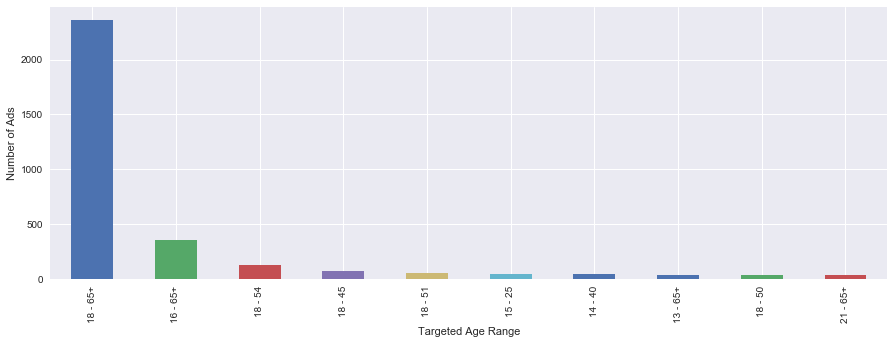

In [6]:
# Examining the age ranges targeted by the Russian-linked ads
fbook.Age.value_counts().head(10).plot(kind='bar', figsize=(15,5))
plt.xlabel('Targeted Age Range')
plt.ylabel('Number of Ads')
plt.show()

Taking a look at how the ads were targeted by age, it appears almost all of the ads were aimed at the widest range of possible ages. So the age of Facebook users is not what drove the targeting of the ads. Since we have a column for gender, let's see if there was a gendered aspect to how these ads were placed. 

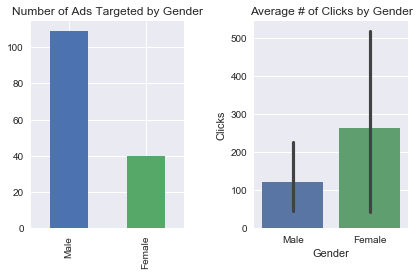

In [7]:
plt.subplot(1,2,1)
fbook['Gender'].value_counts().plot(kind='bar')
plt.title("Number of Ads Targeted by Gender")

plt.subplot(1,2,2)
sns.barplot(x='Gender', y='Clicks', data=fbook)
plt.title('Average # of Clicks by Gender')
plt.tight_layout()

plt.show()

From these plots, we can see that a relatively small number of ads were targeted by gender, roughly 150 out of 3500, yet more than double the ads were targeted at males with over 100 while only 40 were targeted at females. However, when looking at the average number of clicks generated by each group, female-targeted ads have more than double the average clicks that male targeted ads received although this overrepresentation of female clicks could be explained by any high outliers dragging mean clicks up.  

In [8]:
fbook.Clicks.dropna().describe()

count    3.456000e+03
mean     2.130852e+03
std      7.326575e+04
min      0.000000e+00
25%      0.000000e+00
50%      4.700000e+01
75%      5.410000e+02
max      4.303896e+06
Name: Clicks, dtype: float64

In [9]:
fbook[['Clicks', 'Gender']].dropna().groupby('Gender').describe()

Clicks                                                     
        count        mean         std  min  25%  50%   75%     max
Gender                                                            
Female   40.0  264.150000  828.877200  0.0  0.0  0.0  1.25  3501.0
Male    108.0  122.518519  483.315951  0.0  0.0  0.0  0.00  3160.0

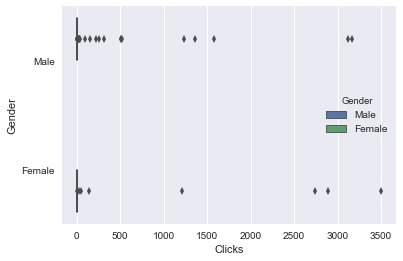

In [11]:
sns.boxplot(fbook['Clicks'], fbook['Gender'], hue='Gender', data=fbook)
plt.show()

From this plot, there appear to be several possible outliers for male and female targeted ads. Let's drop rows with values that lie outside of 1.5 x IQR to get a better sense of the data.

In [12]:
# Function that drops outliers based on specified column
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [13]:
# Perform drop on outliers to clean data. 
fbook = remove_outlier(fbook, 'Clicks')

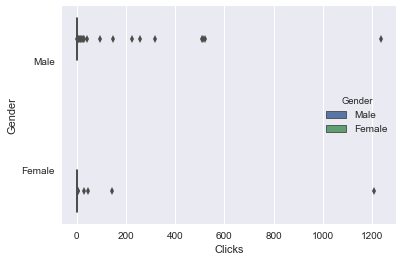

In [14]:
sns.boxplot(fbook['Clicks'], fbook['Gender'], hue='Gender', data=fbook)
plt.show()

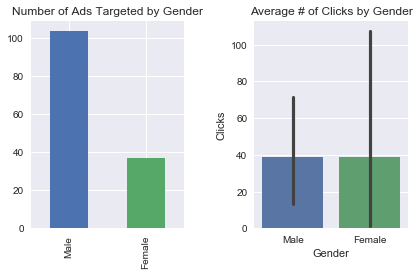

In [15]:
plt.subplot(1,2,1)
fbook['Gender'].value_counts().plot(kind='bar')
plt.title("Number of Ads Targeted by Gender")

plt.subplot(1,2,2)
sns.barplot(x='Gender', y='Clicks', data=fbook)
plt.title('Average # of Clicks by Gender')
plt.tight_layout()

plt.show()

Now with outliers removed from dataset, we still see the disparity by gender between targeted ads, but the average number of clicks between male and female targeted ads are basically equal, although still quite a large error bar for female targeted ads. 

My next area of inquiry is where were these ads placed? Were they focused on one particular platform or more broadly targeted?

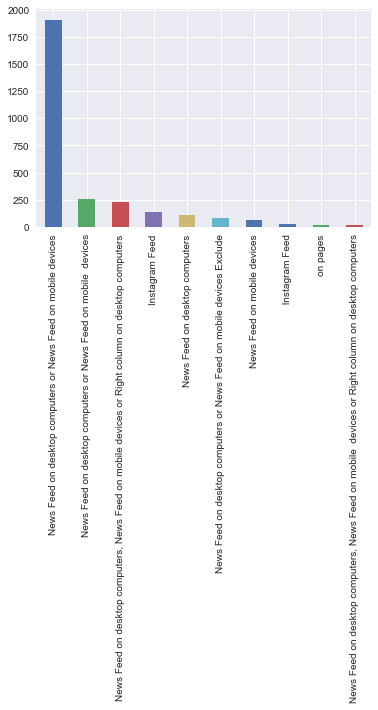

In [16]:
sns.set()
fbook.Placements.value_counts().head(10).plot(kind='bar')
plt.show()

In [17]:
fbook[['AdText','Clicks', 'CreationDate', 'EndDate']].sort_values('Clicks', ascending=False).head(20)

,AdText,Clicks,CreationDate,EndDate
2964,The legendary tennis player Serena Williams ha...,1348.0,05/19/17 07:30:24 AM PDT,05/20/17 07:30:24 AM PDT
2820,"Brown Power is a platform designed to educate,...",1342.0,04/25/17 05:56:10 AM PDT,NaN
3385,Let's make it go viral! Like and share!,1342.0,03/28/17 05:09:49 AM PDT,03/29/17 05:09:49 AM PDT
2541,"Proud moments! Preschool , High School and Col...",1340.0,04/21/17 04:34:00 PM PDT,NaN
2554,Are you ready to protect your community?,1338.0,04/28/17 07:53:48 AM PDT,04/29/17 07:53:48 AM PDT
2628,Actor and comedian Charlie Murphy died at the ...,1337.0,04/13/17 04:40:03 AM PDT,04/14/17 12:00:00 PM PDT
3050,Would you buy it for your girlfriend?,1332.0,05/18/17 04:51:43 AM PDT,05/19/17 08:05:00 AM PDT
2643,Unconditional love and God is her secret to li...,1325.0,04/21/17 05:44:37 AM PDT,04/23/17 08:00:00 AM PDT
2750,Natural heirs of Aztlan.,1318.0,04/18/17 07:36:30 AM PDT,04/19/17 08:20:00 AM PDT
2336,"This holiday season, take some time to visit y...",1314.0,12/27/16 05:42:56 AM PST,12/28/16 05:42:56 AM PST


While ads appear to have been placed across several different aspects of the Facebook platform, the vast majority were placed in the News Feed on both desktop and mobile devices, and not particularly limited to one or the other. Nor were they targeted at specific pages that users were affiliated with. 

So we know these ads were targeted at the widest potential audience, but how much money was spent and did that correspond to an increased number of clicks? 

In [18]:
fbook.AdSpend.dropna().describe()

count     1954.000000
mean       818.155404
std       1842.407397
min          0.050000
25%        100.000000
50%        255.230000
75%        531.745000
max      27500.000000
Name: AdSpend, dtype: float64

In [19]:
print('Total Ad Spend: ', fbook.AdSpend.sum())

Total Ad Spend:  1598675.6600000001


The data shows ad spend varied quite significantly with the least being spent a mere \$0.05 and max of \$27,500, averaging out to around \$818 per ad. The total spent on the ads amounted to \$1,598,675. So how did this money perform in terms of clicks?

In [28]:
# Extract the top performing ads in terms of clicks and their corresponding Ad Spend
fbook[['Clicks', 'AdSpend']].dropna().sort_values(by='Clicks', ascending=False).head(15)

,Clicks,AdSpend
2964,1348.0,300.00
2820,1342.0,4413.97
3385,1342.0,87.68
2541,1340.0,200.00
2554,1338.0,400.00
2628,1337.0,499.49
3050,1332.0,300.00
2643,1325.0,200.00
2750,1318.0,320.00
2336,1314.0,300.00


In [29]:
fbook[['Clicks', 'AdSpend']].dropna().sort_values(by='AdSpend', ascending=False).head(15)

,Clicks,AdSpend
722,0.0,27500.00
759,819.0,20181.68
697,432.0,17339.78
908,857.0,17306.95
1677,865.0,17081.05
1777,873.0,15088.78
1698,65.0,14881.75
1608,1312.0,14705.68
1676,427.0,12918.43
2095,1.0,11399.64


Examining the data in terms of clicks by ad spend, we can see that larger ad spend doesn't necessarily mean a higher click count. The highest performance in clicks only had an ad spend of \$300 while the next highest performance by clicks had an ad spend of roughly \$4,414. Let's look at this graphically to get a sense of performance by ad spend and examine the correlation between these 2 variables. 

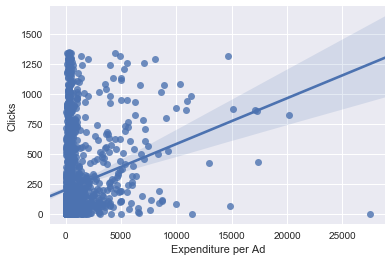

In [30]:
# Plot the relationship between Ad Spend and Clicks
sns.regplot('AdSpend', 'Clicks', data=fbook)
plt.xlabel('Expenditure per Ad')
plt.ylabel('Clicks')
plt.show()

As for any correlation between the 2 variables, I'd like to see what sort of t-value and p-value exist for these variables. If our null hypothesis is that the two variables are uncorrelated, we can expect a p-value greater than 0.05, elsewise we can consider ad spend a potential factor in any experiment we conduct.

In [31]:
stats.ttest_ind(fbook['Clicks'], fbook['AdSpend'].dropna())

Ttest_indResult(statistic=-18.991842728420814, pvalue=1.1905453436538214e-77)

With our outliers removed, we see both graphically and through statistical testing, there is some relationship between the variables. Though our statistical tests simply indicate that a null hypothesis that no relationship exists between these variables is false, it could be productive to take this relationship into account when devising an experiment. Still, we would like to know what types of messages received the highest number of clicks. 

In [32]:
fbook[['AdID', 'AdText','Clicks', 'AdSpend']].sort_values(by='Clicks', ascending=False).head(20)

,AdID,AdText,Clicks,AdSpend
2964,2004,The legendary tennis player Serena Williams ha...,1348.0,300.00
2820,3251,"Brown Power is a platform designed to educate,...",1342.0,4413.97
3385,3041,Let's make it go viral! Like and share!,1342.0,87.68
2541,2174,"Proud moments! Preschool , High School and Col...",1340.0,200.00
2554,2612,Are you ready to protect your community?,1338.0,400.00
2628,1016,Actor and comedian Charlie Murphy died at the ...,1337.0,499.49
3050,2669,Would you buy it for your girlfriend?,1332.0,300.00
2643,1992,Unconditional love and God is her secret to li...,1325.0,200.00
2750,2636,Natural heirs of Aztlan.,1318.0,320.00
2336,3127,"This holiday season, take some time to visit y...",1314.0,300.00


Upon inspecting the ad text with the highest number of clicks, no clear relationship in terms of subject is evident. So it would be best to proceed into our research proposal with the knowledge that ad spend plays some role in the performance of the ad.


   ### Research Proposal

It is a curious challenge to understand how the Russia-linked Internet Research Agency made decisions on how they created and dissiminated the ads they purchased. So to better understand that, I'd like to try and get at what strategies in terms of ad spend they might have taken in to account when making those decisions. Considering the broad targeting of ads, relative impact of ad expenditure, and apparent low importance of the ad text, I am lead to believe that a higher ad spend as compared to the average will have enough impact to justify the expenditure. This analysis might allow us to gain insight into any future Russian attempts to interfere with our elections. 

This leads us to a question: What level of ad spend is the most effective? 

To test this,let's say that ad spend has a higher impact on ad performance than the ad text. To determine this, let's use the ad text from the highest performing ad with the lowest ad spend. For an A/B test setup, I would use this ad text for both my test and control. and purchase ad space with the ad spend for the highest performing ad as my test case. For my control, I would use that ad's original ad spend. This will help to determine whether the ad spend is the most important factor in determing the ads performance or the actual text. 

The rollout of the test and control will be simultaneous, with the ads being targeted randomly and between two groups of facebook users, 100 in each group. Each ad will run for 24 hours, after which its performance will be measured. The outcome of interest will be the number of clicks, with our secondary outcome being impressions. Measuring the performance of each ad against this existing data will help determine if our hypothesis is correct.

Evaluating the outcome of this experiment will be done by comparing the performance of our test case against the control. If the test outperforms the control by at least 15% we will consider the experiment a success. 